# Exercício 1

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, make_scorer, precision_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('class_german_credit.csv')
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


### Age

In [4]:
value_counts = df['Age'].value_counts(dropna=False).sort_index()
value_counts

Age
19     2
20    14
21    14
22    27
23    48
24    44
25    41
26    50
27    51
28    43
29    37
30    40
31    38
32    34
33    33
34    32
35    40
36    39
37    29
38    24
39    21
40    25
41    17
42    22
43    17
44    17
45    15
46    18
47    17
48    12
49    14
50    12
51     8
52     9
53     7
54    10
55     8
56     3
57     9
58     5
59     3
60     6
61     7
62     2
63     8
64     5
65     5
66     5
67     3
68     3
70     1
74     4
75     2
Name: count, dtype: int64

<Axes: title={'center': 'Distribuição de Idades'}, ylabel='Frequency'>

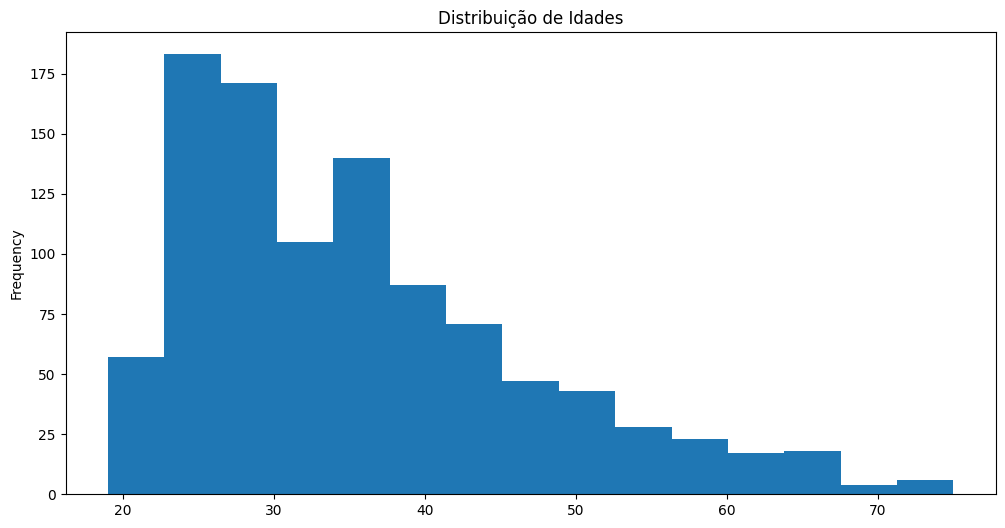

In [5]:
df['Age'].plot(kind='hist', bins=15, figsize=(12, 6), title='Distribuição de Idades')

Por ter muitos dados, é interessante agrupar por faixas etárias para uma visualização mais limpa, menos granular, mas que ainda passa a ideia do comportamento da frequencia dos dados.

<Axes: title={'center': 'Distribuição por Faixa Etária'}, xlabel='AgeGroup'>

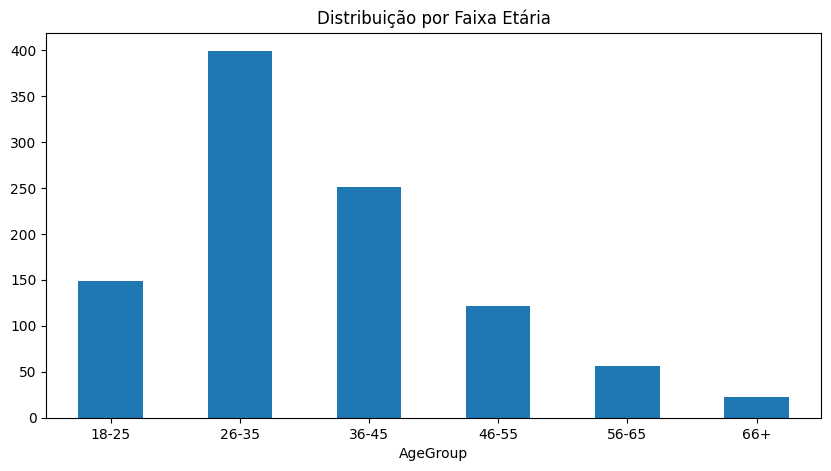

In [6]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['AgeGroup'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title='Distribuição por Faixa Etária', rot=0)

In [7]:
df.drop(columns=['AgeGroup'], inplace=True)

print('min:', df['Age'].min())
print('max:', df['Age'].max())
print('desvio padrão:', df['Age'].std())

min: 19
max: 75
desvio padrão: 11.375468574317512


### Sex

In [8]:
df['Sex'].value_counts(dropna=False).sort_index()

Sex
female    310
male      690
Name: count, dtype: int64

In [9]:
print('min: n/a')
print('max: n/a')
print('desvio padrão: n/a')

min: n/a
max: n/a
desvio padrão: n/a


### Job

In [10]:
df['Job'].value_counts(dropna=False).sort_index()

Job
0     22
1    200
2    630
3    148
Name: count, dtype: int64

In [11]:
job_titles = {
    0: 'Unskilled and non-resident',
    1: 'Unskilled and resident',
    2: 'Skilled',
    3: 'Highly skilled'
}
job_counts = df['Job'].value_counts().sort_index()
job_counts.index = job_counts.index.map(job_titles)
job_counts

Job
Unskilled and non-resident     22
Unskilled and resident        200
Skilled                       630
Highly skilled                148
Name: count, dtype: int64

In [12]:
print('min: n/a')
print('max: n/a')
print('desvio padrão: n/a')

min: n/a
max: n/a
desvio padrão: n/a


### Housing

In [13]:
df['Housing'].value_counts(dropna=False).sort_index()

Housing
free    108
own     713
rent    179
Name: count, dtype: int64

In [14]:
print('min: n/a')
print('max: n/a')
print('desvio padrão: n/a')

min: n/a
max: n/a
desvio padrão: n/a


### Saving account

In [15]:
df['Saving accounts'].value_counts(dropna=False).sort_index()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
NaN           183
Name: count, dtype: int64

In [16]:
print('min: n/a')
print('max: n/a')
print('desvio padrão: n/a')

min: n/a
max: n/a
desvio padrão: n/a


### Checking Account

In [17]:
df['Checking account'].value_counts(dropna=False).sort_index()

Checking account
little      274
moderate    269
rich         63
NaN         394
Name: count, dtype: int64

In [18]:
print('min: n/a')
print('max: n/a')
print('desvio padrão: n/a')

min: n/a
max: n/a
desvio padrão: n/a


### Credit Amount

In [19]:
df['Credit amount'].value_counts(dropna=False).sort_index()

Credit amount
250      1
276      1
338      1
339      1
343      1
        ..
15653    1
15672    1
15857    1
15945    1
18424    1
Name: count, Length: 921, dtype: int64

<Axes: ylabel='Frequency'>

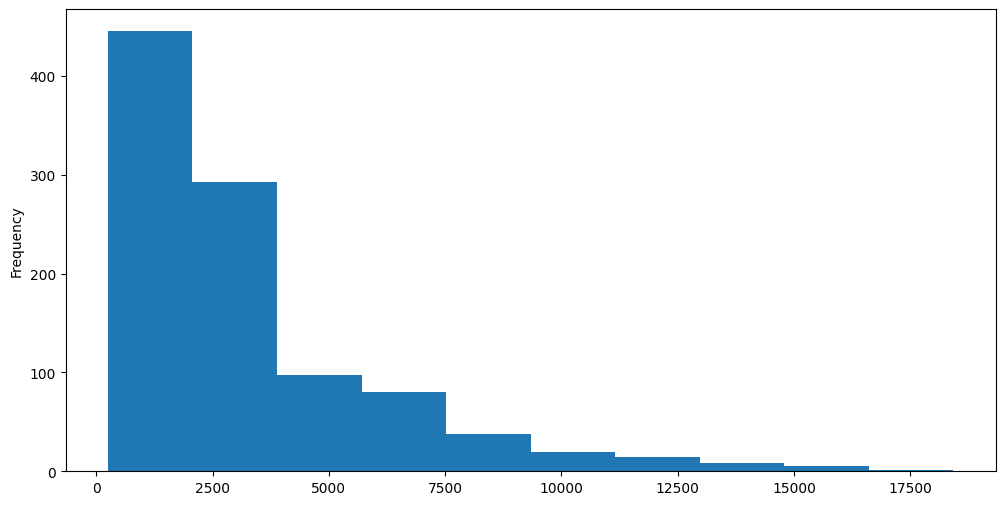

In [20]:
df['Credit amount'].plot(kind='hist', bins=10, figsize=(12, 6))

In [21]:
print('min:', df['Credit amount'].min())
print('max:', df['Credit amount'].max())
print('desvio padrão:', df['Credit amount'].std())

min: 250
max: 18424
desvio padrão: 2822.7368759604406


### Duration

In [22]:
df['Duration'].value_counts(dropna=False).sort_index()

Duration
4       6
5       1
6      75
7       5
8       7
9      49
10     28
11      9
12    179
13      4
14      4
15     64
16      2
18    113
20      8
21     30
22      2
24    184
26      1
27     13
28      3
30     40
33      3
36     83
39      5
40      1
42     11
45      5
47      1
48     48
54      2
60     13
72      1
Name: count, dtype: int64

<Axes: title={'center': 'Frequência das Durações (Agrupadas)'}, xlabel='DurationGroup'>

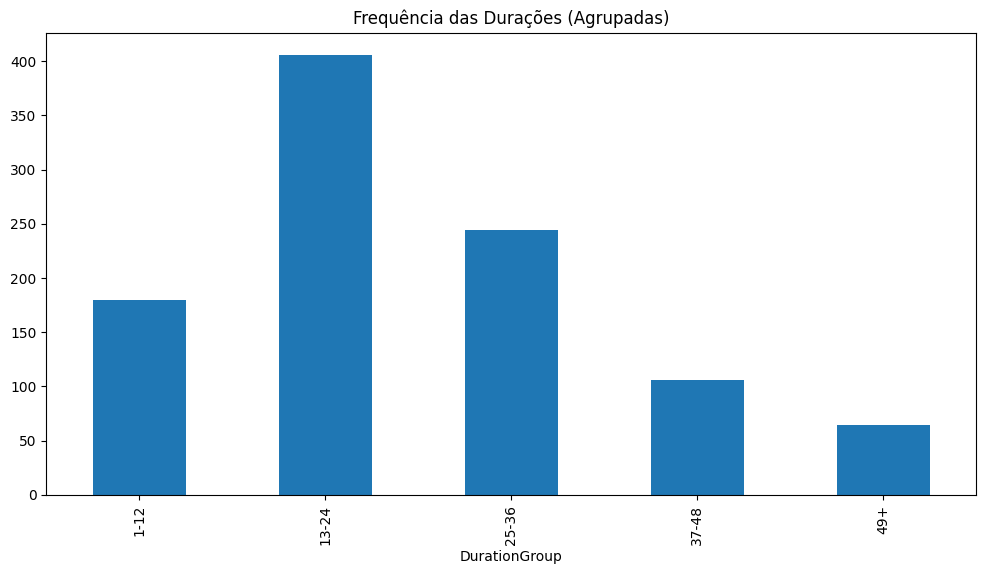

In [23]:
bins_duration = [0, 12, 24, 36, 48, df['Duration'].max() + 1]
labels_duration = ['1-12', '13-24', '25-36', '37-48', '49+']
df['DurationGroup'] = pd.cut(df['Duration'], bins=bins_duration, labels=labels_duration, right=False)
df['DurationGroup'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title='Frequência das Durações (Agrupadas)')

In [24]:
df.drop(columns=['DurationGroup'], inplace=True)

print('min:', df['Duration'].min())
print('max:', df['Duration'].max())
print('desvio padrão:', df['Duration'].std())

min: 4
max: 72
desvio padrão: 12.058814452756375


### Purpose

In [25]:
df['Purpose'].value_counts(dropna=False).sort_index()

Purpose
business                97
car                    337
domestic appliances     12
education               59
furniture/equipment    181
radio/TV               280
repairs                 22
vacation/others         12
Name: count, dtype: int64

In [26]:
print('min: n/a')
print('max: n/a')
print('desvio padrão: n/a')

min: n/a
max: n/a
desvio padrão: n/a


## Avaliação da Árvore de Decisão

## Definindo as funções a serem utilizadas

### Carregamento e separação dos dados

In [27]:
def load_and_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Aplica OrdinalEncoder para colunas categóricas
    cat_cols = X.select_dtypes(include='object').columns
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    
    X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
    X_test[cat_cols] = encoder.transform(X_test[cat_cols])
    
    return X_train, X_test, y_train, y_test


### Treinar uma árvore de decisão

In [28]:
def trained_model(X_train, y_train):
    param_grid = {
        'max_depth': [2, 4, 8, 16, 32, 64, None],
        'min_samples_split': [2, 4, 8, 16, 32, 64],
        'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64]
    }

    precision_good_scorer = make_scorer(precision_score, pos_label='good')

    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        cv=5,  # 5-fold cross-validation
        scoring=precision_good_scorer,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print("Melhores hiperparâmetros:", grid_search.best_params_)
    return grid_search.best_estimator_

def predict_and_evaluate(model, X_test, y_test):
    # Avaliação no conjunto de teste
    y_pred = model.predict(X_test)
    print("Relatório:\n", classification_report(y_test, y_pred))


### Sem Tratamento dos Dados

In [29]:
X = df.drop('Risk', axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = load_and_split(X, y)

model = trained_model(X_train, y_train)
predict_and_evaluate(model, X_test, y_test)

Melhores hiperparâmetros: {'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 2}
Relatório:
               precision    recall  f1-score   support

         bad       0.49      0.42      0.45        59
        good       0.77      0.82      0.79       141

    accuracy                           0.70       200
   macro avg       0.63      0.62      0.62       200
weighted avg       0.69      0.70      0.69       200



### Limpando os Dados (Outliers e Missing)

#### Missing - Removendo Linhas

In [30]:
df_cleaned = df.dropna()

X = df_cleaned.drop('Risk', axis=1)
y = df_cleaned['Risk']

X_train, X_test, y_train, y_test = load_and_split(X, y)
model = trained_model(X_train, y_train)
predict_and_evaluate(model, X_test, y_test)

Melhores hiperparâmetros: {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 2}
Relatório:
               precision    recall  f1-score   support

         bad       0.52      0.58      0.55        50
        good       0.57      0.51      0.54        55

    accuracy                           0.54       105
   macro avg       0.54      0.54      0.54       105
weighted avg       0.55      0.54      0.54       105



#### Missing - Removendo Colunas

In [31]:
df_cleaned = df.dropna(axis=1)

X = df_cleaned.drop('Risk', axis=1)
y = df_cleaned['Risk']

X_train, X_test, y_train, y_test = load_and_split(X, y)
model = trained_model(X_train, y_train)
predict_and_evaluate(model, X_test, y_test)

Melhores hiperparâmetros: {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 2}
Relatório:
               precision    recall  f1-score   support

         bad       0.41      0.54      0.46        59
        good       0.78      0.67      0.72       141

    accuracy                           0.63       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.67      0.63      0.64       200



#### Missing (categorico) - Moda

In [32]:
df_mode_filled = df.copy()
df_mode_filled['Saving accounts'].fillna(df_mode_filled['Saving accounts'].mode()[0], inplace=True)
df_mode_filled['Checking account'].fillna(df_mode_filled['Checking account'].mode()[0], inplace=True)

X = df_mode_filled.drop('Risk', axis=1)
y = df_mode_filled['Risk']

X_train, X_test, y_train, y_test = load_and_split(X, y)
model = trained_model(X_train, y_train)
predict_and_evaluate(model, X_test, y_test)

/tmp/ipykernel_465119/2517684225.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode_filled['Saving accounts'].fillna(df_mode_filled['Saving accounts'].mode()[0], inplace=True)
/tmp/ipykernel_465119/2517684225.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

Melhores hiperparâmetros: {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 2}
Relatório:
               precision    recall  f1-score   support

         bad       0.42      0.51      0.46        59
        good       0.78      0.71      0.74       141

    accuracy                           0.65       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.67      0.65      0.66       200



#### Outliers

In [33]:
Q1 = df['Credit amount'].quantile(0.25)
Q3 = df['Credit amount'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encontrar outliers
df_sem_outlier = df[(df['Credit amount'] >= limite_inferior) & (df['Credit amount'] <= limite_superior)]

X = df_sem_outlier.drop('Risk', axis=1)
y = df_sem_outlier['Risk']

X_train, X_test, y_train, y_test = load_and_split(X, y)
model = trained_model(X_train, y_train)
predict_and_evaluate(model, X_test, y_test)


Melhores hiperparâmetros: {'max_depth': 8, 'min_samples_leaf': 16, 'min_samples_split': 2}
Relatório:
               precision    recall  f1-score   support

         bad       0.55      0.52      0.53        52
        good       0.82      0.84      0.83       134

    accuracy                           0.75       186
   macro avg       0.68      0.68      0.68       186
weighted avg       0.74      0.75      0.74       186



# Exercício 2

## Método 1 - Árvore de Decisão

In [34]:
X = df.drop('Risk', axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = load_and_split(X, y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
tree_importances = pd.Series(model.feature_importances_, index=X.columns)
tree_importances.sort_values(ascending=False)[:5]


Credit amount       0.255074
Age                 0.205892
Duration            0.130905
Checking account    0.119156
Purpose             0.086709
dtype: float64

## Método 2 - ANOVA (f_classif) – Numéricos

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

df.dropna(inplace=True)

X = df.drop('Risk', axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = load_and_split(X, y)

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_train[num_cols], y_train)
anova_scores = pd.Series(anova_selector.scores_, index=num_cols)
anova_scores.sort_values(ascending=False)[:5]

Duration            46.528937
Credit amount       19.456633
Saving accounts      5.404087
Checking account     5.321128
Age                  1.398350
dtype: float64

## Qui-quadrado – Categóricos

In [36]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder

df.dropna(inplace=True)

X = df.drop('Risk', axis=1)
y = df['Risk']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = load_and_split(X, y)

X_encoded = X_train.copy()
encoder = OrdinalEncoder()
X_encoded[cat_cols] = encoder.fit_transform(X_encoded[cat_cols])

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_encoded[cat_cols], y_train)
chi2_scores = pd.Series(chi2_selector.scores_, index=cat_cols)
chi2_scores.sort_values(ascending=False)[:5]


Saving accounts     9.294797
Checking account    3.555395
Purpose             1.338454
Sex                 0.259784
Housing             0.023897
dtype: float64

In [37]:
# Unir tudo em um único DataFrame
ranking_df = pd.DataFrame({
    'Decision Tree': tree_importances,
    'ANOVA (num)': anova_scores,
    'Chi2 (cat)': chi2_scores
})

# Ranking (quanto menor o número, mais importante)
ranking_df_ranked = ranking_df.rank(ascending=False)
ranking_df_ranked = ranking_df_ranked.sort_values(by='Decision Tree')
print(ranking_df_ranked)


                  Decision Tree  ANOVA (num)  Chi2 (cat)
Credit amount               1.0          2.0         NaN
Age                         2.0          5.0         NaN
Duration                    3.0          1.0         NaN
Checking account            4.0          4.0         2.0
Purpose                     5.0          6.0         3.0
Saving accounts             6.0          3.0         1.0
Job                         7.0          8.0         NaN
Housing                     8.0          9.0         5.0
Sex                         9.0          7.0         4.0
